## Predicting Chronic Kidney disease
This data was referenced in the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/chronic_kidney_disease) and was collected from a hospital  to predict from the predictor variables if a patient has chronic kidney disease or not. This is a classification problem with 11 numeric predictors and 14 categorical variables. Apart from classification of chronic kidney diseases we would like to see which predictor variables are the most important factor for this classification. First we load the data and do some exploratory data analysis.


In [27]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
# read data frame and set up the column names
dfor = pd.read_csv('csv_result-chronic_kidney_disease_full.csv',error_bad_lines=False)
dfor.columns = ['id','age','blood pressure','specific gravity','albumin','sugar','red blood cells','pus cell','pus cell clumps','bacteria','blood glucose random', \
'blood urea','serum creatinine','sodium','potassium','hemoglobin','packed cell volume','white blood cell count','red blood cell count', \
'hypertension','diabetes mellitus','coronary artery disease','appetite','pedal edema','anemia','class']
dfor.head()

b'Skipping line 71: expected 26 fields, saw 27\nSkipping line 74: expected 26 fields, saw 27\nSkipping line 371: expected 26 fields, saw 27\n'


,id,age,blood pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,...,packed cell volume,white blood cell count,red blood cell count,hypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class
0,1,48,80,1.020,1,0,?,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,2,7,50,1.020,4,0,?,normal,notpresent,notpresent,...,38,6000,?,no,no,no,good,no,no,ckd
2,3,62,80,1.010,2,3,normal,normal,notpresent,notpresent,...,31,7500,?,no,yes,no,poor,no,yes,ckd
3,4,48,70,1.005,4,0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,5,51,80,1.010,2,0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


There are many unknown entries in the dataframe denoted by "?" sign. For ease of processing the data we convert them into NAN's. At this point the id of the patient seems to be an unnecessary addition and we wont us eit for our analysis so its safe to drop the id. We do the follwing changes and have a look at our dataframe head. 

In [2]:
dfor.replace('?', np.NaN,inplace=True)  # replace ? by NaN
dfor.drop(['id'], axis=1,inplace=True)  # drop id column ass its unnecessary for our calculations
dfor = dfor.sample(frac=1).reset_index(drop=True)
dfor.head()


,age,blood pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,blood glucose random,...,packed cell volume,white blood cell count,red blood cell count,hypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class
0,46,60,1.020,0,0,normal,normal,notpresent,notpresent,102,...,44,11000,5.4,no,no,no,good,no,no,notckd
1,63,70,1.025,0,0,normal,normal,notpresent,notpresent,130,...,41,7300,4.7,no,no,no,good,no,no,notckd
2,49,80,1.020,0,0,normal,normal,notpresent,notpresent,122,...,41,5600,4.9,no,no,no,good,no,no,notckd
3,30,70,1.015,0,0,NaN,normal,notpresent,notpresent,101,...,NaN,NaN,NaN,no,no,no,poor,no,no,ckd
4,69,80,1.020,3,0,abnormal,normal,notpresent,notpresent,NaN,...,NaN,NaN,NaN,yes,no,no,good,no,no,ckd


### Exploratory data analysis 

Lets see some of the details of the dataframe. 

In [3]:
dfor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 25 columns):
age                        388 non-null object
blood pressure             385 non-null object
specific gravity           350 non-null object
albumin                    351 non-null object
sugar                      348 non-null object
red blood cells            247 non-null object
pus cell                   332 non-null object
pus cell clumps            393 non-null object
bacteria                   393 non-null object
blood glucose random       354 non-null object
blood urea                 378 non-null object
serum creatinine           380 non-null object
sodium                     312 non-null object
potassium                  311 non-null object
hemoglobin                 345 non-null object
packed cell volume         327 non-null object
white blood cell count     292 non-null object
red blood cell count       267 non-null object
hypertension               395 non-null object
di

We can see we have many missing values as there are 397 entries(rows) but most of the predictors have something lower than that. Also we see that the dataframe recognizes all the variables as object but we know that there are 11 numeric variables and 14 categorical variables(total 25),so we need to change the numeric variables type. We identify the required variables and change their type as we see below.

In [4]:
numericlist =['age','blood pressure' ,'blood glucose random', \
'blood urea','serum creatinine','sodium','potassium','hemoglobin','packed cell volume', \
              'white blood cell count','red blood cell count']
for x in numericlist:
    dfor[x]= dfor[x].apply(pd.to_numeric,errors='coerce') # change the type of columns
    
dfor.info();dfor.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 25 columns):
age                        388 non-null float64
blood pressure             385 non-null float64
specific gravity           350 non-null object
albumin                    351 non-null object
sugar                      348 non-null object
red blood cells            247 non-null object
pus cell                   332 non-null object
pus cell clumps            393 non-null object
bacteria                   393 non-null object
blood glucose random       354 non-null float64
blood urea                 378 non-null float64
serum creatinine           380 non-null float64
sodium                     312 non-null float64
potassium                  311 non-null float64
hemoglobin                 345 non-null float64
packed cell volume         327 non-null float64
white blood cell count     292 non-null float64
red blood cell count       267 non-null float64
hypertension               395 non-nul

(397, 25)

In [5]:
num_cols = dfor._get_numeric_data().columns # these are the numeric variables
print('There are ' + str(len(num_cols)) +' numeric columns and they are ' + str(num_cols) )

cat_cols=list(set(dfor.columns)-set(num_cols)) # these are the catagorical variables #(dfor.columns).difference(num_cols)
print('There are ' + str(len(cat_cols)) +' categorical columns and they are ' + str(cat_cols) )

There are 11 numeric columns and they are Index(['age', 'blood pressure', 'blood glucose random', 'blood urea',
       'serum creatinine', 'sodium', 'potassium', 'hemoglobin',
       'packed cell volume', 'white blood cell count', 'red blood cell count'],
      dtype='object')
There are 14 categorical columns and they are ['sugar', 'albumin', 'pedal edema', 'diabetes mellitus', 'red blood cells', 'anemia', 'coronary artery disease', 'specific gravity', 'hypertension', 'appetite', 'pus cell', 'pus cell clumps', 'class', 'bacteria']


We would first like to have a look at our target variable. Here it is the class ckd(chronic kidney disease) or notckd(not chronic kidney disease). Its a categorical variable and so we see how many of the cases are there for these 2 catagories.We find below the ckd cases are quite large(248) compared to the nonckd cases(149).  

ckd       248
notckd    149
Name: class, dtype: int64


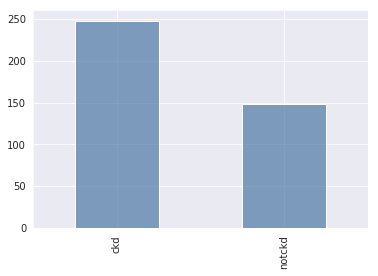

In [6]:
dfor['class'].value_counts().plot.bar(color=(0.2, 0.4, 0.6, 0.6))
print(dfor['class'].value_counts())

Now we should turn our attention to the predictor variables(clinical parameters). First we see how the individual independent variables are distributed then we will try look at their interactions. First we look at how the numeric  variables are distributed.

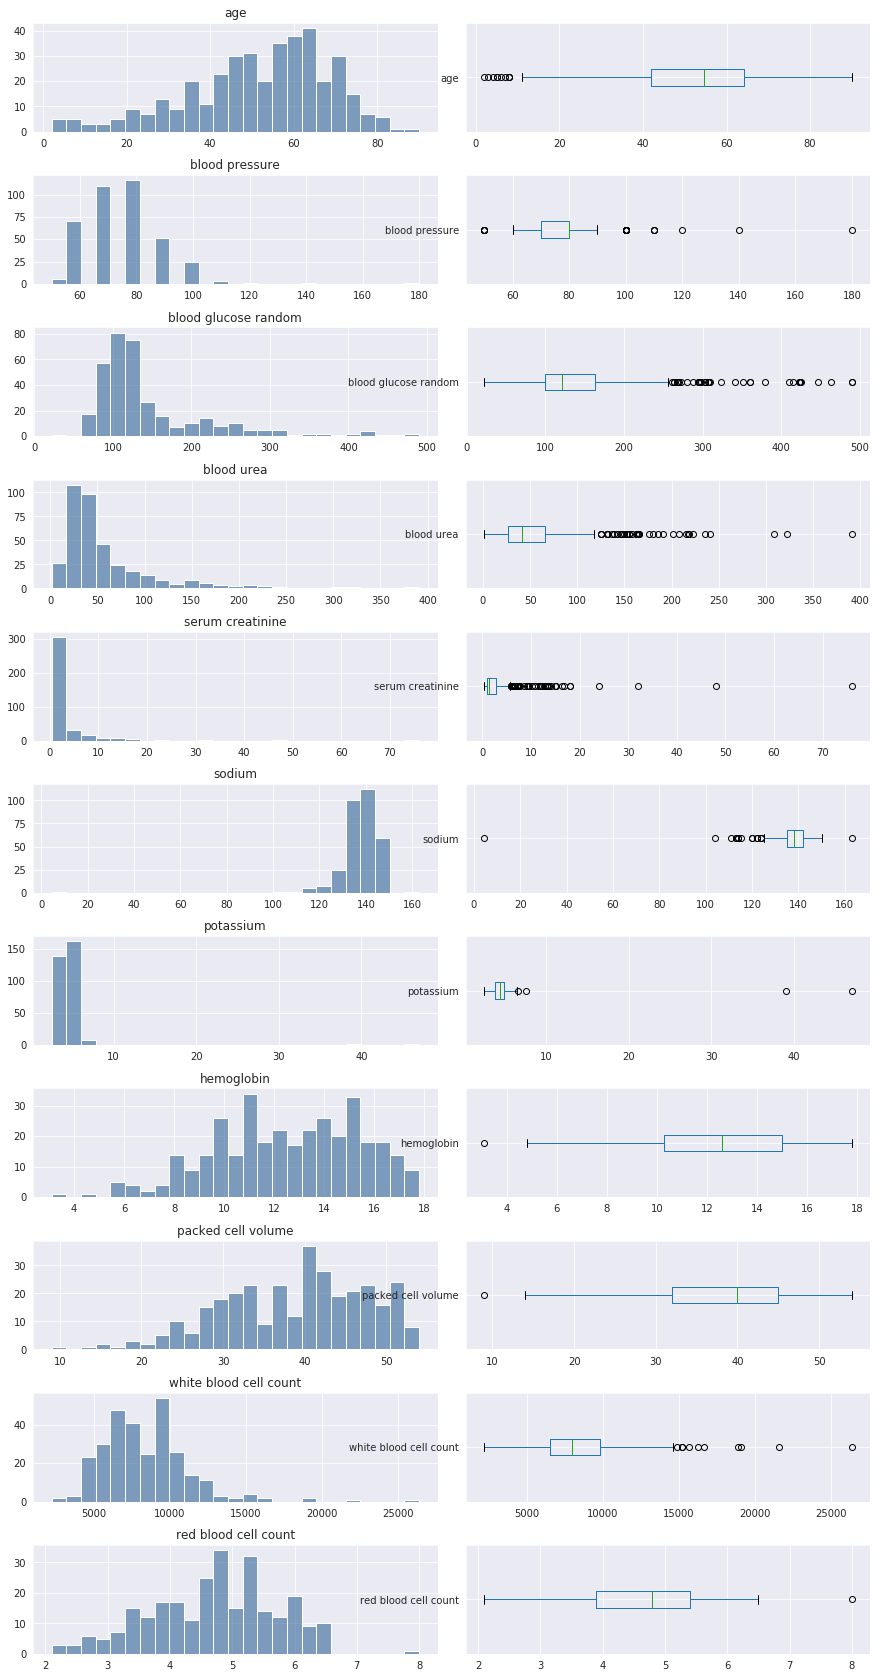

In [7]:
fig1 = plt.figure(figsize=(15, 30))
for count,i in zip(np.arange(0,len(num_cols)+1),num_cols):
    
    ax = fig1.add_subplot(11,2,count*2+1)
    ax=dfor[i].hist(bins=25,color=(0.2, 0.4, 0.6, 0.6))
    ax.set_title(str(i))
    ax = fig1.add_subplot(11,2,count*2+2)
    
    ax=dfor[i].plot.box(vert=False)
fig1.subplots_adjust(hspace = .4, wspace=0.07)


We see that most of the variables like age hemoglobin white blood ceel count are right skewed and some like white blood cell count blood urea blood glucose random are left skewed. We will take care of these during our analysis. Some numeric variable like blood pressure seems to be divided into 5 groups. So we will try to see if it can be analyzed differently probably grouping it into different bins. Most of the variables have some values which are quite far from the rest in the group. We need to deal with these outliers also. So now lets have a look at the catagorical independent variables. Some of these character varirables might be ordinal variables like sugar specific gravity however we will treat them as catagorical as the data is not accompanied by any description. 

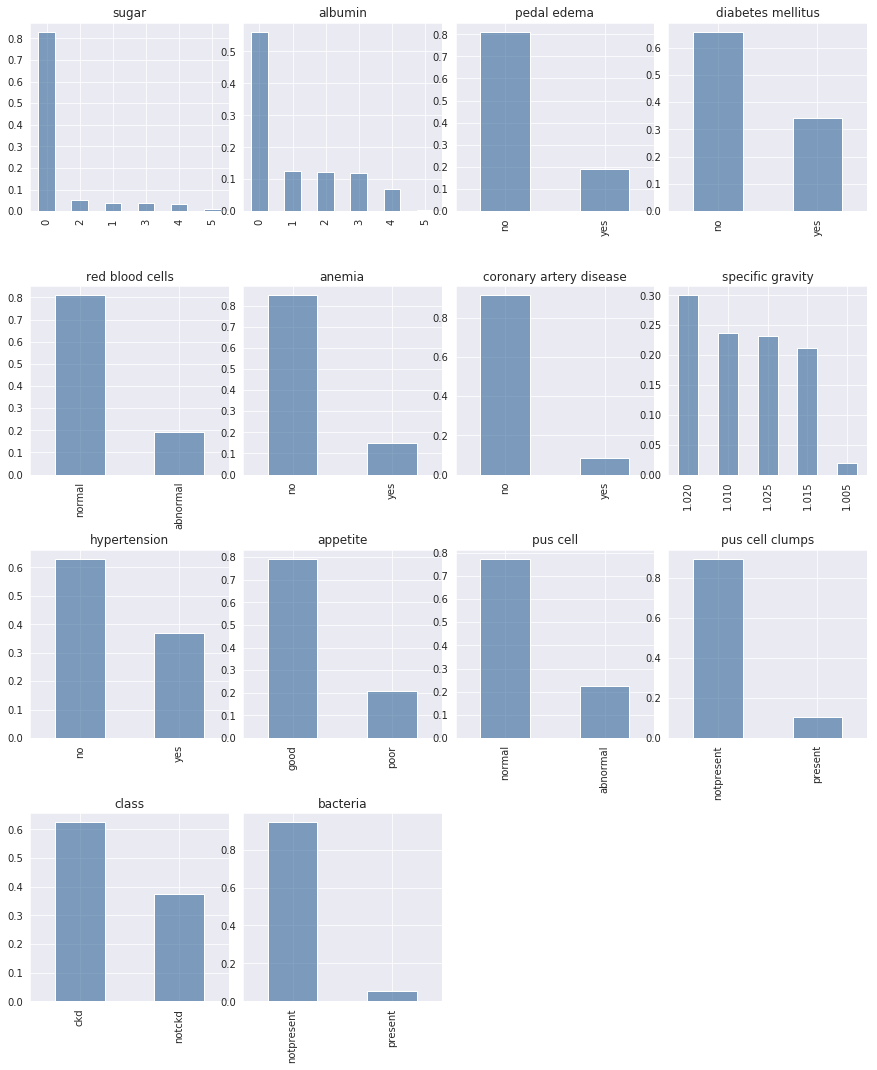

In [8]:
sns.set_style('darkgrid')
fig2 = plt.figure(figsize=(15, 18))

#count = 0
for count,i in zip(np.arange(1,len(cat_cols)+1),cat_cols):
    
    ax = fig2.add_subplot(4,4,count)
    ax=dfor[i].value_counts(normalize=True).plot.bar( title= str(i),color=(0.2, 0.4, 0.6, 0.6))

fig2.subplots_adjust(hspace = .4, wspace=0.07)

Most of the patients are not aneamic doesnt have hypertension, pedal anema,pus cell clumps,coronary artery disease,bacteria as well as their appettite, red blood cells are normal. So let us see with respect to our target varibale how they get split. 

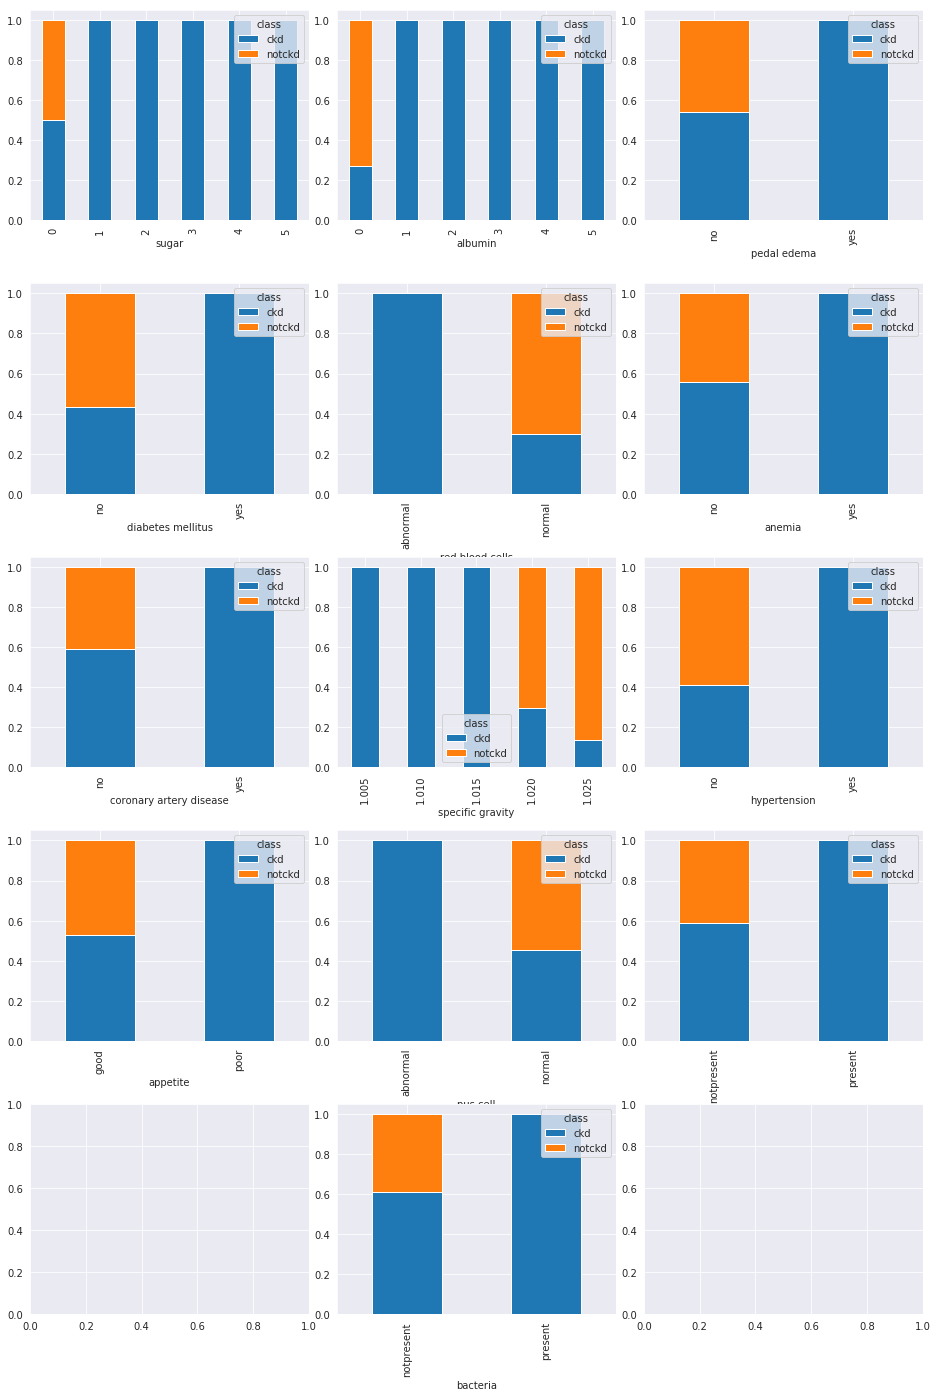

In [9]:
sns.set_style('darkgrid')
no_cols=3
fig4, axes = plt.subplots(figsize=(16,24),nrows=5, ncols=no_cols)
for count,i in zip(np.arange(0,len(cat_cols)),cat_cols):
    if i != 'class':
        ctab=pd.crosstab(dfor[i],dfor['class'])
        
        
        ctab.div(ctab.sum(1), axis=0).plot(ax=axes[(count//no_cols),(count % no_cols)],kind='bar',stacked=True)
        
        

fig4.subplots_adjust(hspace = .3, wspace=0.1)

Exploring the above figure we find notckd class is present in some of the divisions only for example for poor appettite we dont find any nonckd cases also like for some of the variables like albumin and sugar we dont find any nonckd cases for the subclassifications(like 1,2,3,4,5 and the same for albumin). So we can group these classifications of sugar and albumin into a different class(where we dont have any nonckd classes.We will make these changes but before that let us fill up the missing values. We will fill up the missing values with median(which is less susceptible to outliers) for the numeric variables and the modes for the catagorical variables. Lets first see how many NA's do we have in the next section 

### Missing Value and Outliers and Feature Engineering

In [10]:
dfor.isnull().sum()

age                          9
blood pressure              12
specific gravity            47
albumin                     46
sugar                       49
red blood cells            150
pus cell                    65
pus cell clumps              4
bacteria                     4
blood glucose random        43
blood urea                  19
serum creatinine            17
sodium                      85
potassium                   86
hemoglobin                  52
packed cell volume          70
white blood cell count     105
red blood cell count       130
hypertension                 2
diabetes mellitus            2
coronary artery disease      2
appetite                     1
pedal edema                  1
anemia                       1
class                        0
dtype: int64

We have a lot NAs for the red blood cells and red blood cell count which is around 40% of our data.We will see if this is important we might remove them from our data.  At this point we would like to divide our data set into the training set and the test set and we will do the same operations(transformations) in test set as we will do for the training set. 

In [11]:
# breaking data into test and train set
# test will be kept aside to see how well our model predicts. 
indx = np.random.rand(len(dfor)) < 0.7
train = dfor[indx]
test = dfor[~indx]
print(len(test))
print(len(train))

122
275


In [12]:
# following same procedure for both test and train data sets filling missing
#values with mean and median
for i in cat_cols:
    train[i].fillna(train[i].mode()[0], inplace=True)
for i in num_cols:
    train[i].fillna(train[i].median(), inplace=True)
for i in cat_cols:
    test[i].fillna(test[i].mode()[0], inplace=True)
for i in num_cols:
    test[i].fillna(test[i].median(), inplace=True)

/home/woodrow/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5434: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


For the numeric variables we see below how the variables split according to the ckd or nonckd cases. There are many variables so we split them into 2 groups to view them well.

/home/woodrow/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


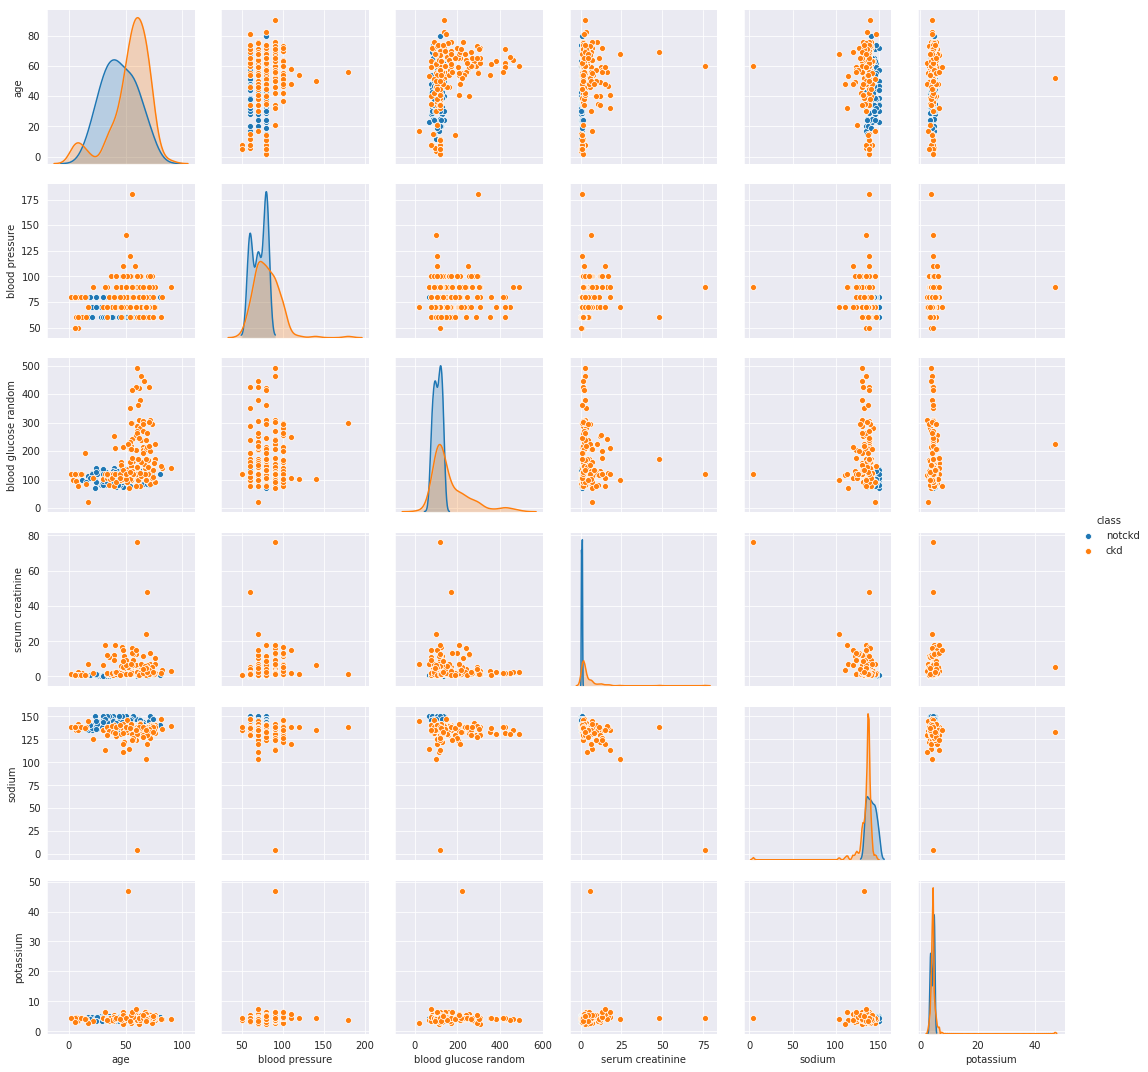

In [13]:
g = sns.pairplot(train,vars=['age', 'blood pressure', 'blood glucose random',
       'serum creatinine', 'sodium', 'potassium'],hue='class')

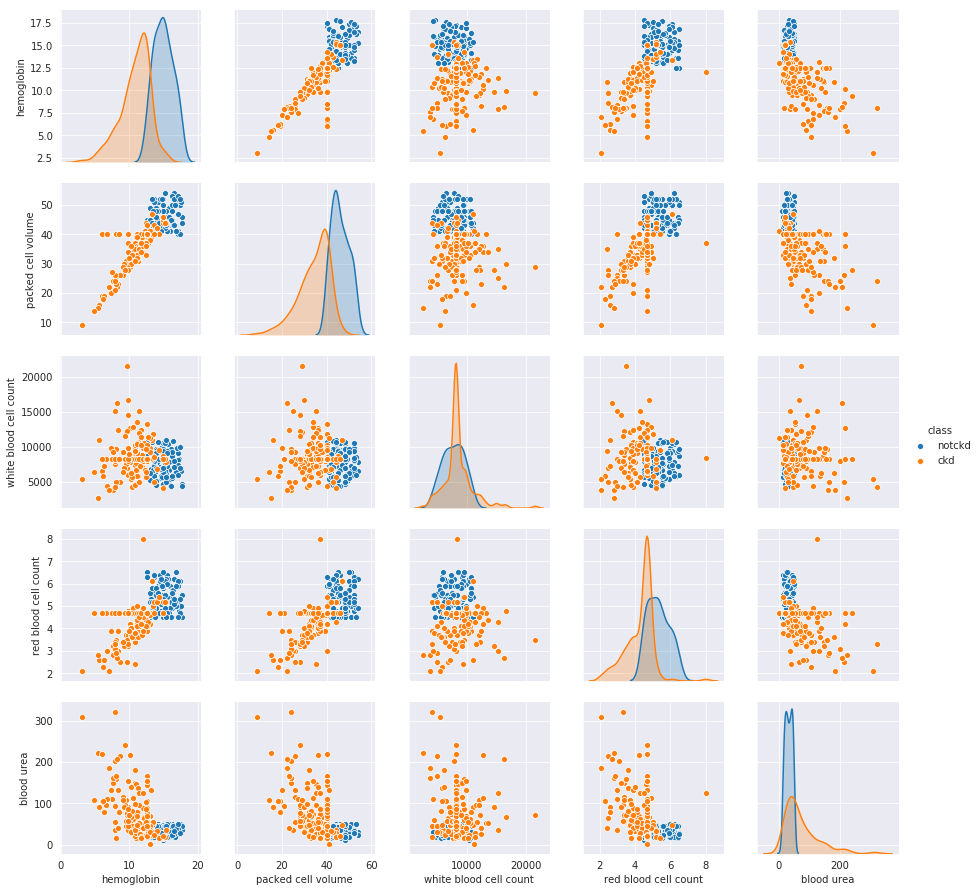

In [14]:
g = sns.pairplot(train,vars=['hemoglobin', 'packed cell volume', 'white blood cell count', 'red blood cell count', 'blood urea'],hue='class')

The above paiplots show boxed or rectungular shaped seggregation of nonckd cases in a particular area for most of the plots above. This might be a good indicator that a decision tree algorithm might be a good fit here.  

* Some of the numeric variables like blood urea and blood glocuse random are skewed towards the left side if we take the log of it such skewness can be reduced which helps in better prediction
* We saw that some of the variables like sugar the nonckd is not present for the people who has 1,2,3,4,5 so we can all group them in class say 1. The same logic goes for albumin and specific gravity.
* Dummy variables: For the categorical variables we want to convert it to dummy variables so that we can use logistic regression or any other classification model we want. (The get_dummy does this job and we dont need all the dummy variables and we dont take the first one as its redundant and the required information is contained in the rest)
 

In [15]:
# grouping sugar albumin and specific gravity into necessary groups for both test and train
train['sugar'][train['sugar'] != '0'] = 1
train['albumin'][train['albumin'] != '0'] = 1
train['specific gravity'][(train['specific gravity'] != '1.020') &  (train['specific gravity'] != '1.025')] = 1.015
test['sugar'][test['sugar'] != '0'] = 1
test['albumin'][test['albumin'] != '0'] = 1
test['specific gravity'][(test['specific gravity'] != '1.020') &  (test['specific gravity'] != '1.025')] = 1.015
train=pd.get_dummies(train,drop_first=True)
test=pd.get_dummies(test,drop_first=True)

/home/woodrow/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/woodrow/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:7626: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/home/woodrow/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3267: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/woodrow/anacond

In [16]:
# log helps in reducing skewness and variabilty (test and train both)
train['blood urea']=np.log(train['blood urea'])
train['blood glucose random']=np.log(train['blood glucose random'])
test['blood urea']=np.log(test['blood urea'])
test['blood glucose random']=np.log(test['blood glucose random'])


Text(0.5, 1.0, 'log blood urea')

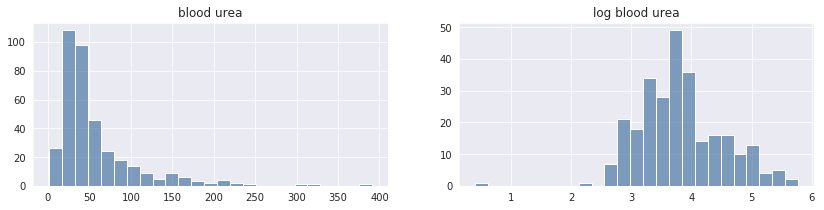

In [17]:
fig6 = plt.figure(figsize=(14, 3))
ax = fig6.add_subplot(1,2,1)
ax=dfor['blood urea'].hist(bins=25,color=(0.2, 0.4, 0.6, 0.6))
ax.set_title('blood urea')
ax = fig6.add_subplot(1,2,2)
ax=train['blood urea'].hist(bins=25,color=(0.2, 0.4, 0.6, 0.6))
ax.set_title('log blood urea' )

The log removed the skewness as we can see above from one of the examlples. Next we would like to look at how the predictor variables are correlated with each other. Very high correlation can be used to fill up missing values and can often render some predictor variables irrelevant.Here we find packed cell volume and hemoglobin are highly correlated(~0.9) so we can even work with one of them. 

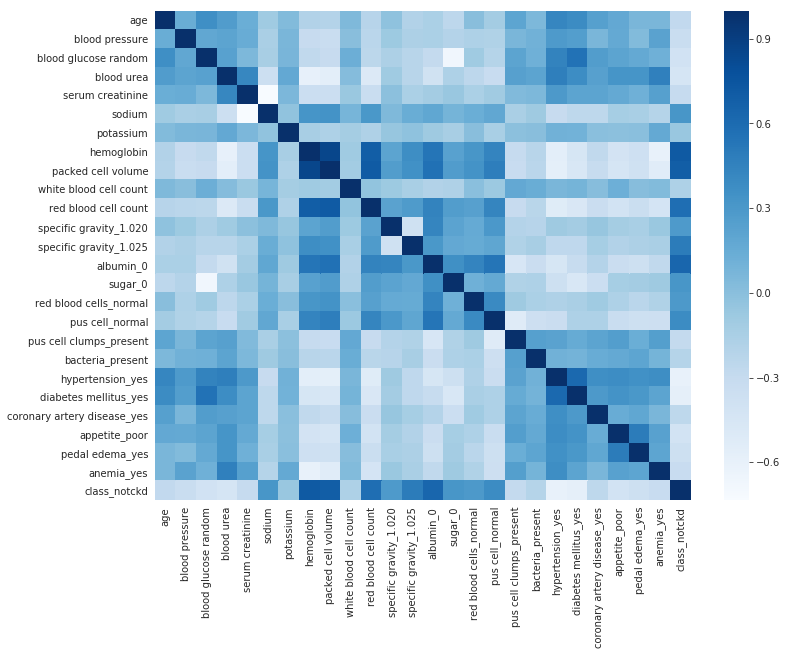

In [18]:
fig7, axes = plt.subplots(figsize=(12,9))
matrix = train.corr()
sns.heatmap(train.corr(),cmap="Blues")

### Model Building

The bivariate analysis gave us a strong indication(based on the ways the ckd and nonckd classes were distributed in most of the bivariate plots) that a tree based method might be the best model for this kind of data. We will try out the tree based methods(like decision trees) since its very easy to interpret. But we will also try the logistic regression to see how it does. Logistic regression though mathematically simplest of all is difficult to interpret whereas tree based methods are quite easy to interpret. 

#### Logistic regression

Logistic regression models the probability of the outcome belonging to a class.

In [19]:
# Importing packages for  logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# dividing the data for train into predictor and target
X_train = train.drop('class_notckd',1)
y_train=train.class_notckd
X_train = X_train.reset_index(drop=True)
y_train= y_train.reset_index(drop=True)

# same for test data
X_test = test.drop('class_notckd',1)
y_test=test.class_notckd
X_test = X_test.reset_index(drop=True)
y_test= y_test.reset_index(drop=True)




classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print('the confusion matrix is ')  
print(confusion_matrix)
print('Accuracy of logistic regression classifier on test set ' +str(classifier.score(X_test, y_test)))



the confusion matrix is 
[[71  4]
 [ 1 46]]
Accuracy of logistic regression classifier on test set 0.9590163934426229


/home/woodrow/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


The high accuracy rate alone does not necessarily tells us that our prediction model is doing well. For example if we have 95% of our data type A and 5% type B we do nothing and predict all outcomes to be type A we will have a high accuracy of at least 0.95. So we have to see the confusion matrix which  gives us the True negatives and True positives and False negatives and positives.

We find our model did well for the test data set but it might be a chance so we want fit our model on multiple training sets and see how it works on different test sets.But since we have only one set of data we divide our data into different training and test sets. And care is also taken so that the division is done according to the ratios of our ckd and nonckd cases.For example our original data has 67% ckd and 37% nonckd cases. So when we divide our data we want to do so such that similar ratios exist in our data sets. We use the stratified Kfold logistic regression(k=5) and see how the regression model performs for 5 different cases. Below we see it did a pretty robust job giving us the impression that the logistic regression model well classifies our data.   


In [20]:
from sklearn.model_selection import StratifiedKFold
X=X_train
y=y_train
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
     print('\n{} of kfold {}'.format(i,kf.n_splits))
     xtr,xvl = X.loc[train_index],X.loc[test_index]
     ytr,yvl = y[train_index],y[test_index]
    
     model = LogisticRegression(random_state=1)
     model.fit(xtr, ytr)
     pred_test = model.predict(xvl)
     score = accuracy_score(yvl,pred_test)
     print('accuracy_score',score)
     i+=1
pred=model.predict_proba(xvl)[:,1]

# code taken from vidhya


1 of kfold 5
accuracy_score 1.0

2 of kfold 5
accuracy_score 1.0

3 of kfold 5
accuracy_score 0.9818181818181818

4 of kfold 5
accuracy_score 0.9629629629629629

5 of kfold 5
accuracy_score 0.9814814814814815


/home/woodrow/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/woodrow/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/woodrow/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/woodrow/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/woodrow/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to '

Logistic regression model might be little difficult to interpret and so we will see a decision tree classification next which is very easy to interpret.

#### Decision Trees

These methods segment the predictor space into a no of regions. The rules of these segmentation can be presented in a tree based form which is very easy to interpret.(The tree is created or the seggregration is done by a top down greedy approach.)

In [21]:
# done in r
#library(rpart)
#tree <- rpart(class_notckd ~ . , method='class', data= df)
#printcp(tree)
#plot(tree)
#text(tree,pretty=4)

Classification tree:
rpart(formula = class_notckd ~ ., data = df, method = "class")

Variables actually used in tree construction:
[1] albumin_0          hemoglobin         packed.cell.volume

Root node error: 98/269 = 0.36431

n= 269 

        CP nsplit rel error  xerror     xstd
1 0.806122      0   1.00000 1.00000 0.080539
2 0.071429      1   0.19388 0.19388 0.042879
3 0.010204      2   0.12245 0.19388 0.042879
4 0.010000      3   0.11224 0.19388 0.042879

Below we see a tree presentation of the above algorithm (tree is pruned to avoid overfitting).It is surprisingly easy to interpret. Also the branch lengths show the importance of the predictor variables. That is for classifying whether or not chronic kidney disease is present the single most important factor is the hemoglobin. 

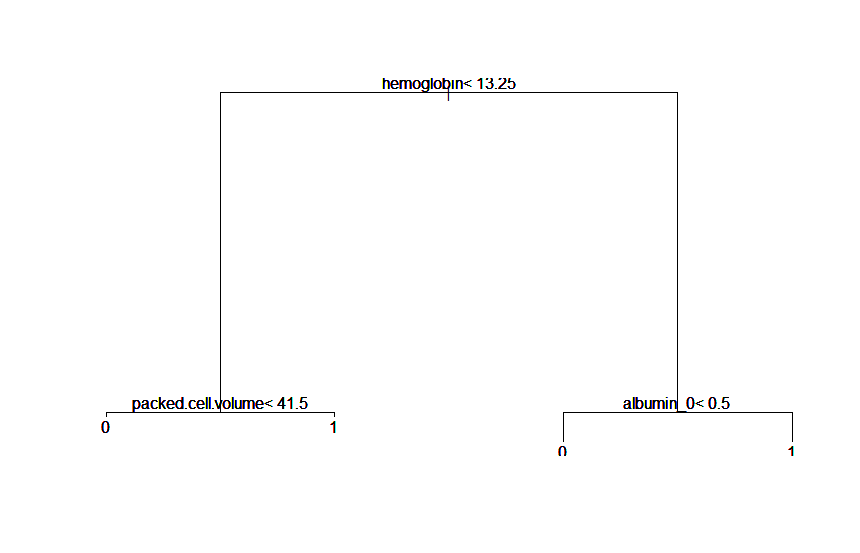

In [22]:
from IPython.display import Image
Image(filename="Rplot03.png",width= 600,height=600)


It can be viewed in a better way also as shown here. So a doctor can easily classify a patient case as a nonckd or a ckd one by this simple diagram. He will see if a patients hemoglobin is greater or less than 13.25 and then will see the packed cell volume and albumin and then will check the conditions there and arrive to the conclusion if its 0(ckd) or 1(nonckd) 


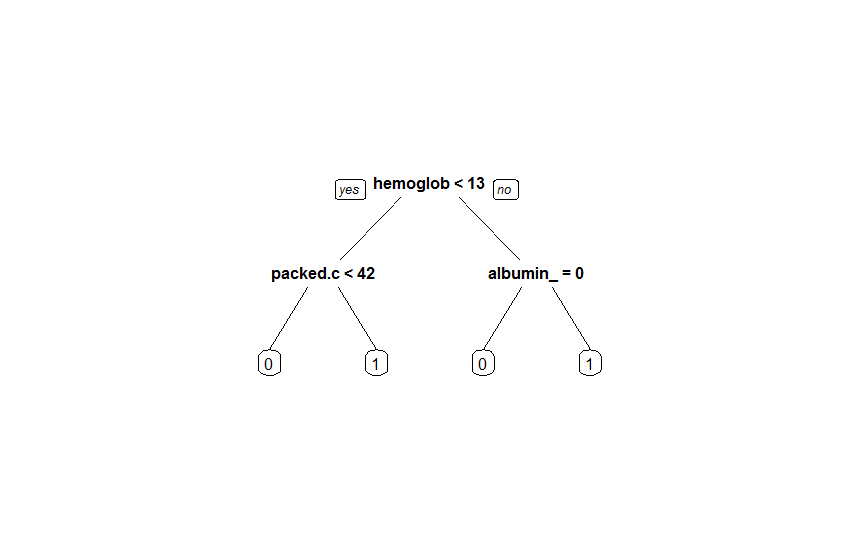

In [23]:
from IPython.display import Image
Image(filename="Rplot02.png",width=600,height=500)

#### Random Forest Classifier

However decision trees have a very high variabilty.In our case the accuracy is high still has a very high variabilty. So if we break up the training set into 2 parts or we are given 2 training sets chances are we would end up having 2 different decision trees and that might be confusing for the doctor who would taking a decision based on these methos. So to have more robustness in our model we would use the random forest classifier which is a kind of average over trees such that the correlation between trees are smaller. 

In [24]:
from sklearn.ensemble import RandomForestClassifier
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
     print('\n{} of kfold {}'.format(i,kf.n_splits))
     xtr,xvl = X.loc[train_index],X.loc[test_index]
     ytr,yvl = y[train_index],y[test_index]
    
     model = RandomForestClassifier(random_state=1, max_depth=10)
     model.fit(xtr, ytr)
     pred_test = model.predict(xvl)
     score = accuracy_score(yvl,pred_test)
     print('accuracy_score',score)
     i+=1

# codes taken from Vidhya


1 of kfold 5
accuracy_score 0.9821428571428571

2 of kfold 5
accuracy_score 0.9821428571428571

3 of kfold 5
accuracy_score 0.9818181818181818

4 of kfold 5
accuracy_score 0.9444444444444444

5 of kfold 5
accuracy_score 0.9259259259259259


/home/woodrow/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/woodrow/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/woodrow/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/woodrow/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/woodrow/anaconda3/lib/python3.7/si

In [25]:
pred_test = model.predict(test.drop('class_notckd',1))
pred2=model.predict_proba(test.drop('class_notckd',1))[:,1]

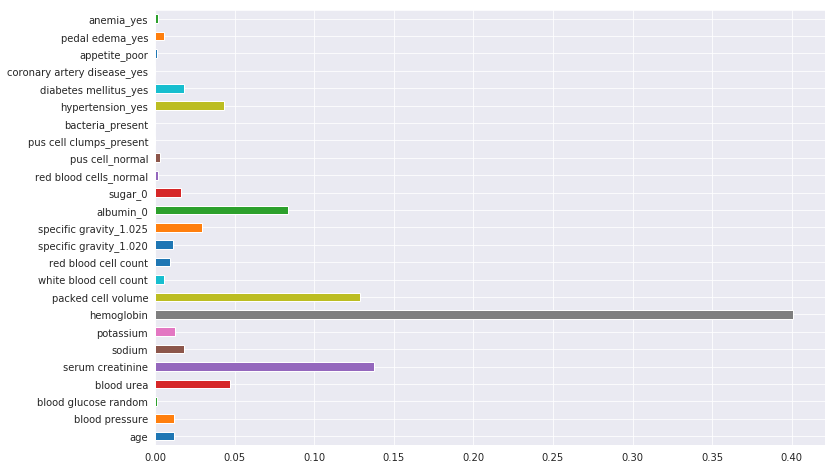

In [26]:
importances=pd.Series(model.feature_importances_, index=X.columns)
importances.plot(kind='barh', figsize=(12,8))

Here we loose the easy way of interpreting our results like a decision tree but we gain in the sense that this classifier is less variable. And we can see the features which are most important here. For eg hemoglobin and albumin and serum creatinin are the primary features for this classification obviously the elephant in the room is hemoglobin which we saw for the decision tree also. 

Disclaimer:: Some of the codes are directly taken from package instructions in websites to follow conventions.